In [4]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

## Get reward csv files for liftcube

drq_v2

In [26]:
model = "drq_v2"
task = "liftcube"
directory = Path.cwd().parents[0]
training_location = 'training/'
liftcube_reward_drq_dir = directory / model/ training_location/ task

runs = [1,2,3]
drq_data = pd.DataFrame()
for run in runs:
    run_dir = liftcube_reward_drq_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # remove episode number column
    print(run_data.columns)
    run_data = run_data.drop(columns=['Episode num'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    drq_data = pd.concat([drq_data, run_data], axis=1)
    # create another column for the average reward
    drq_data[model + '_avg'] = drq_data.mean(axis=1)

print(drq_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
      drq_v2_1  drq_v2_avg    drq_v2_2    drq_v2_3
0    13.532847   16.980102   27.848417    8.234441
1    38.887274   33.366147   15.683807   47.740721
2    66.080704   34.992474    5.676842   22.266267
3    19.849569   38.847887   50.459935   55.029020
4    20.683733   22.218386   31.244524   12.741291
..         ...         ...         ...         ...
994        NaN  304.170574  387.144384  138.222954
995        NaN  389.667318  389.335035  390.331883
996        NaN  399.764236  407.862688  383.567332
997        NaN  271.668529  205.597956  403.809675
998        NaN  408.721356  407.946253  410.271562

[999 rows x 4 columns]


sac

In [27]:
model = "sac"
task = "liftcube"
directory = Path.cwd().parents[0]
training_location = 'training/'
liftcube_reward_sac_dir = directory / model/ training_location/ task

runs = [1,2,3]

sac_data = pd.DataFrame()
for run in runs:
    run_dir = liftcube_reward_sac_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # remove episode number column
    run_data = run_data.drop(columns=['Episode number'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    sac_data = pd.concat([sac_data, run_data], axis=1)
    # create another column for the average reward
    sac_data[model + '_avg'] = sac_data.mean(axis=1)
        
print(sac_data)

          sac_1     sac_avg       sac_2       sac_3
0     51.348833   49.383495   67.378905   22.114051
1     32.202548   32.257986   12.919892   58.134509
2     63.770441   38.539354   19.458883   21.928168
3     28.221083   23.606919    8.254587   36.386422
4     51.972439   49.003955   30.196239   69.133437
..          ...         ...         ...         ...
945  311.130232  335.341097  294.677730  429.910361
946  232.190932  266.631487  336.479762  230.901377
947  286.960427  364.194099  417.200630  422.241512
948  300.157018  292.570289  359.059533  191.273417
949  427.008404  425.841354  422.650482  428.150769

[950 rows x 4 columns]


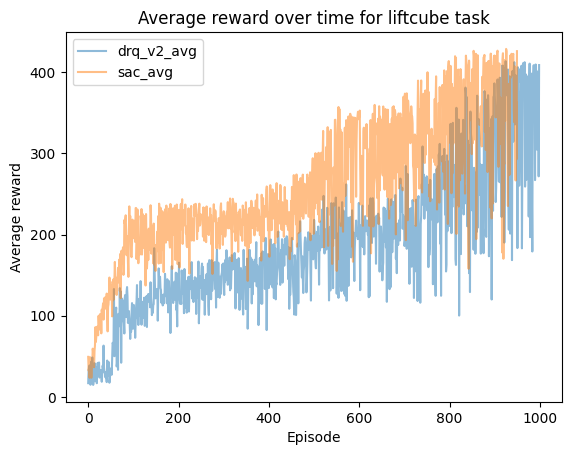

In [29]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for liftcube task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()

## Get reward csv files for stackcube

drq_v2

In [ ]:
model = "drq_v2"
task = "stackcube"
directory = Path.cwd().parents[0]
training_location = 'training/'
liftcube_reward_drq_dir = directory / model / training_location / task

runs = [1, 2, 3]
drq_data = pd.DataFrame()
for run in runs:
    run_dir = liftcube_reward_drq_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # remove episode number column
    print(run_data.columns)
    run_data = run_data.drop(columns=['Episode num'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    drq_data = pd.concat([drq_data, run_data], axis=1)
    # create another column for the average reward
    drq_data[model + '_avg'] = drq_data.mean(axis=1)

print(drq_data)


sac

In [ ]:
model = "sac"
task = "stackcube"
directory = Path.cwd().parents[0]
training_location = 'training/'
liftcube_reward_sac_dir = directory / model / training_location / task

runs = [1, 2, 3]

sac_data = pd.DataFrame()
for run in runs:
    run_dir = liftcube_reward_sac_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # remove episode number column
    run_data = run_data.drop(columns=['Episode number'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    sac_data = pd.concat([sac_data, run_data], axis=1)
    # create another column for the average reward
    sac_data[model + '_avg'] = sac_data.mean(axis=1)

print(sac_data)


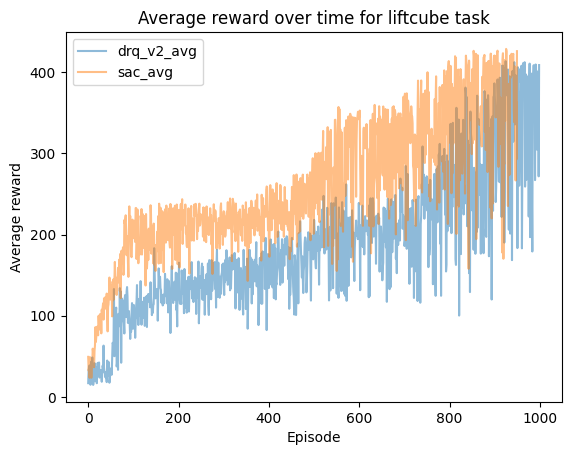

In [ ]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for stackcube task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()

## Get reward csv files for turnfaucet